## TP Statistiques # 1 : Régression Linéaire

#### Dans ce TP, on va chercher à établir une relation linéaire entre une variable, dite expliquée, et une ou plusieurs variables, dites explicatives. C'est ce qu'on appelle la régression linéaire ou le calcul d'un modèle linéaire.

In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics as skmetrics
from sklearn.linear_model import LinearRegression as sklearnLinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy as sy
import sympy
import pandas as pd
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm
from matplotlib import animation
#import mpld3
#mpld3.enable_notebook()

# QUESTION 1 à 5

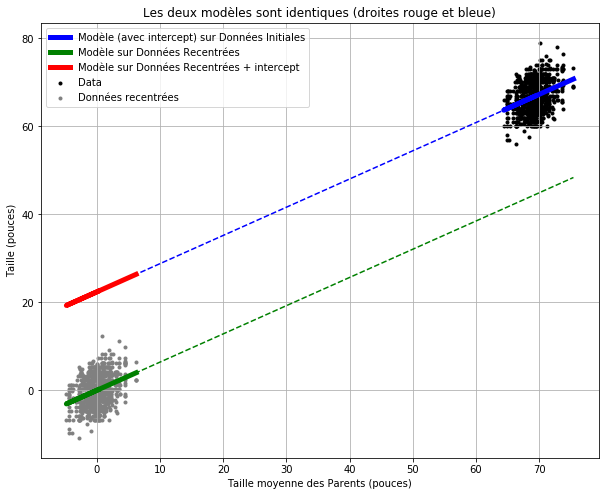

In [2]:
# Header = ['Family	Father	Mother	Gender	Height	Kids']
# lecture des données
data = pd.read_csv('https://bitbucket.org/portierf/shared_files/downloads/Galton.txt',sep='\t')
# ajout d'une colonne supplementaire
data["MeanParents"]= 0.5*(data["Father"] + 1.08*data["Mother"])
# print(data.sample(5))
# print(data.info())
x_i = data["MeanParents"].values.reshape(-1,1)
y_i = data["Height"].values.reshape(-1,1)
fig1 = plt.figure(figsize=(10,8))
pla=plt.scatter(x_i,y_i,marker='.',color='black',label='Data')

# Create linear regression object and fit on RAW data
regr = sklearnLinearRegression()    
regr.fit(x_i,y_i)
y_iEst = regr.predict(x_i.reshape(-1,1))
theta_1 = regr.coef_[0][0] 
theta_0 = regr.intercept_[0]

# centrage du data
xc_i = x_i - np.mean(x_i)
yc_i = y_i - np.mean(y_i)
pla=plt.scatter(xc_i,yc_i,marker='.',color='grey',label='Données recentrées')
regrc = sklearnLinearRegression()  # fit_intercept=True here just to get thetac_0 = 0 otherwise no output
regrc.fit(xc_i,yc_i)
yc_iEst = regrc.predict(xc_i.reshape(-1,1))
thetac_1 = regrc.coef_[0][0] 
thetac_0 = regrc.intercept_[0]
plt.plot(np.append(0,x_i),np.append(np.array(regr.intercept_),y_iEst),color='b',linestyle='--')
plt.plot(x_i,y_iEst,label='Modèle (avec intercept) sur Données Initiales',color='b',linestyle='-',linewidth=5)
plt.plot(xc_i,yc_iEst,label='Modèle sur Données Recentrées',linestyle='-',color='g',linewidth=5)
plt.plot(np.append(xc_i,x_i[0]),np.append(yc_iEst,regrc.coef_*x_i[0]),color='g',linestyle='--')
plt.plot(xc_i,yc_iEst + theta_0,label='Modèle sur Données Recentrées + intercept',linestyle = '-', color='r',linewidth=5)
plt.title("Les deux modèles sont identiques (droites rouge et bleue)")
plt.ylabel('Taille (pouces)')
plt.xlabel('Taille moyenne des Parents (pouces)')
plt.legend()
plt.grid(True)
plt.show()

#### Sur la figure on observe bien que les deux modèles sont identiques (droite rouge et droite bleue)

#### La régression linéaire sur l'ensemble des données (en noir) donne la droite d'équation : 

In [3]:
print('Y = {:.3f} X + {:.3f}'.format(float(regr.coef_[0]),float(regr.intercept_[0])))

Y = 0.641 X + 22.376


#### La régression linéaire sur l'ensemble des données centrées (en gris) donne la droite d'équation :

In [4]:
print('Y = {:.3f} X + {:.3f}'.format(float(regrc.coef_[0]),float(regrc.intercept_[0])))

Y = 0.641 X + -0.000


## Comparaison des deux modèles :
#### Modèle avec intercept : $\hspace{10mm} Y=\theta_0 + X \theta_1$ 
#### Modèle recentré (sans intercept) : $\hspace{10mm} \tilde{Y}=\tilde{X} \tilde{\theta}$ $\iff (Y-\bar{Y})=(X-\bar{X}) \tilde{\theta}$ $\iff Y=(\bar{Y}-\bar{X} \tilde{\theta})+ X \tilde{\theta}$
#### Les deux modèles sont équivalents si ces deux conditions sont vérifiées : 
$\hspace{10mm} \mathbf{1)} \hspace{5mm}  \theta_0=\bar{Y}-\bar{X} \tilde{\theta} \hspace{10mm}$     et $\hspace{10mm} \mathbf{2)} \hspace{5mm} \theta_1=\tilde{\theta}$

In [5]:
print("La condition 1 est-elle vérifiée ? {}".format(np.isclose(theta_0, np.mean(y_i) - np.mean(x_i) * thetac_1)))
print("La condition 2 est-elle vérifiée ? {}".format(np.isclose(theta_1, thetac_1)))
Diff = float(regr.coef_[0][0] - regrc.coef_[0][0])
print("Il y a {:.2f}".format(float(Diff/regr.coef_*100))+" % d'erreur entre les deux modèles.")
print("Difference entre les deux coefficients directeurs = {:.2f}".format(float(Diff/regr.coef_)*100) +" % d'erreur")
#np.testing.assert_array_equal(regr.coef_,regrc.coef_)
print("L'identité des deux modèles est-elle vérifiée ? " + str(np.allclose(y_i,yc_i+np.mean(y_i))) )

La condition 1 est-elle vérifiée ? True
La condition 2 est-elle vérifiée ? True
Il y a 0.00 % d'erreur entre les deux modèles.
Difference entre les deux coefficients directeurs = 0.00 % d'erreur
L'identité des deux modèles est-elle vérifiée ? True


#### Les coefficients directeurs des deux droites précédemment calculés sont identiques. Le modèle avec intercept et le modèle sans intercept (c'est à dire après recentrage des données) donnent tous les deux le même résultat.

# QUESTION 6

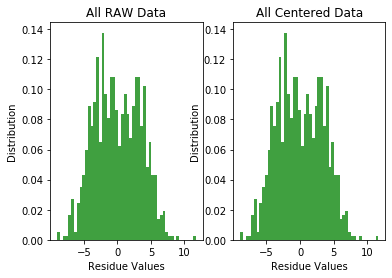

In [6]:
# QUESTION 6 : HISTOGRAMME DES RESIDUS
r_i =  y_i - y_iEst 
rc_i =  yc_i - yc_iEst 
fig2 = plt.figure()
plt.subplot(1,2,1)
n, bins, patches = plt.hist(r_i, 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel("Residue Values")
plt.ylabel("Distribution")
plt.title("All RAW Data")
plt.subplot(1,2,2)
n, bins, patches = plt.hist(rc_i, 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel("Residue Values")
plt.ylabel("Distribution")
plt.title("All Centered Data")
print("")

#### Les histogrammes qui représentent la distribution des résidus dans les deux cas (variables brutes et variables recentrées) présentent une forme non-gaussienne avec un minimum local en zéro. Par conséquent, l'hypothèse de normalité n'est pas crédible. Dans la suite on va chercher à expliquer ce problème.

# QUESTION 7

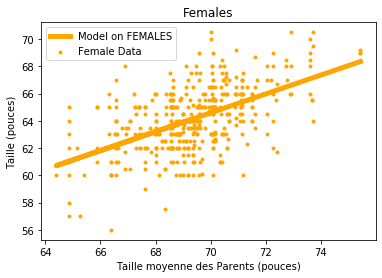

In [7]:
df_f = data[data["Gender"]=="F"].copy()
df_f.head()
x_if = df_f[["MeanParents"]]
y_if = df_f[["Height"]] 
regrf = sklearnLinearRegression() 
regrf.fit(x_if,y_if)
y_ifEst = regrf.predict(x_if)#.reshape(-1,1))
fig3 = plt.figure()
scf=plt.scatter(x_if,y_if,marker='.',color='orange',label='Female Data')
plf=plt.plot(x_if,y_ifEst,color='orange',label = 'Model on FEMALES',linewidth=5)
plt.legend()
plt.ylabel('Taille (pouces)')
plt.xlabel('Taille moyenne des Parents (pouces)')
plt.title('Females')
plt.show()

#### La régression linéaire sur les données filles donne la droite d'équation :

In [8]:
print('Y = {:.3f} X + {:.3f}'.format(float(regrf.coef_[0]),float(regrf.intercept_[0])))

Y = 0.693 X + 16.057


# QUESTION 8

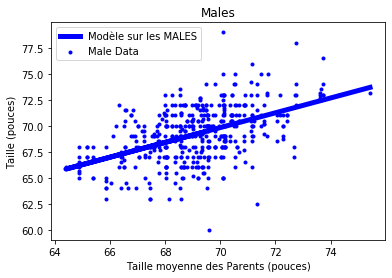

In [9]:
df_m = data[data["Gender"]=="M"].copy()
df_m.head()
x_im = df_m["MeanParents"].values.reshape(-1,1)
y_im = df_m["Height"].values.reshape(-1,1)
regrm = sklearnLinearRegression() 
regrm.fit(x_im,y_im)
y_imEst = regrm.predict(x_im)
scm=plt.scatter(x_im,y_im,marker='.',color='blue',label='Male Data')
plm=plt.plot(x_im,y_imEst,color='blue',label = 'Modèle sur les MALES',linewidth=5)
plt.ylabel('Taille (pouces)')
plt.xlabel('Taille moyenne des Parents (pouces)')
plt.title('Males')
plt.legend()
plt.show()

#### La régression linéaire sur les données garçons donne la droite d'équation :

In [10]:
print('Y = {:.3f} X + {:.3f}'.format(float(regrm.coef_[0]),float(regrm.intercept_[0])))

Y = 0.712 X + 19.991


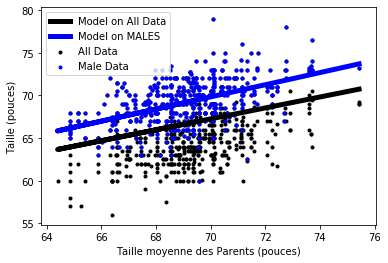

In [11]:
fig4 = plt.figure()
sca=plt.scatter(x_i,y_i,marker='.',color='black',label='All Data')
pla=plt.plot(x_i,y_iEst,color='black',label='Model on All Data',linewidth=5)
scm=plt.scatter(x_im,y_im,marker='.',color='blue',label='Male Data')
plm=plt.plot(x_im,y_imEst,color='blue',label = 'Model on MALES',linewidth=5)
plt.ylabel('Taille (pouces)')
plt.xlabel('Taille moyenne des Parents (pouces)')
plt.legend()
plt.show()

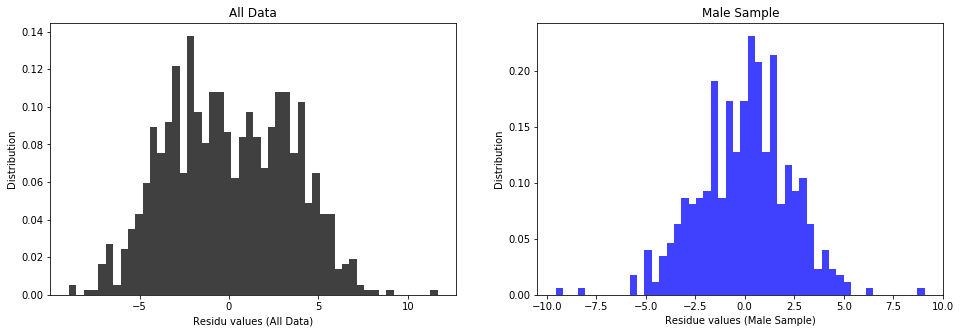

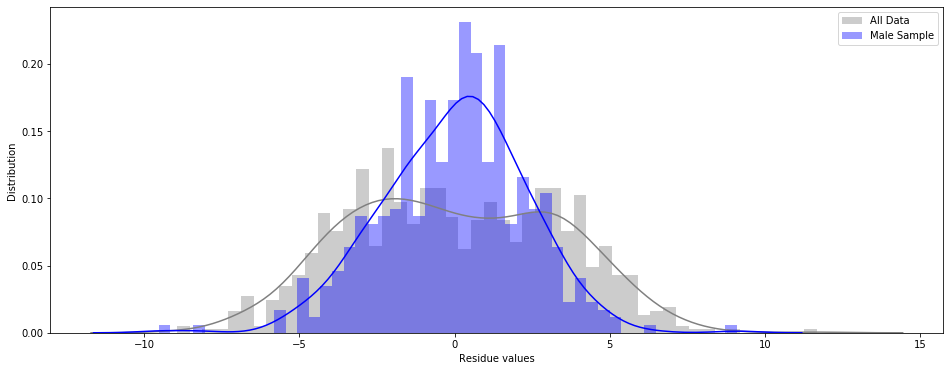

In [12]:
r_i =  y_i - y_iEst
r_im =  y_im - y_imEst
fig5 = plt.figure(figsize=(16,5))
# distribution histogram of the residus
plt.subplot(1,2,1)
ni, binsi, patchesi = plt.hist(r_i, 50, density=True, facecolor='k', alpha=0.75,label="All Data")
plt.xlabel("Residu values (All Data)")
plt.ylabel("Distribution")
plt.title("All Data")
plt.subplot(1,2,2)
nim, binsim, patchesim = plt.hist(r_im, 50, density=True, facecolor='b', alpha=0.75,label="Male Sample")
plt.xlabel("Residue values (Male Sample)")
plt.ylabel("Distribution")
plt.title("Male Sample")
fig6 = plt.figure(figsize=(16,6))
plt.tight_layout()
sns.distplot(r_i,label='All Data',color='grey',bins=50)
sns.distplot(r_im,label='Male Sample',color='blue',bins=50)
plt.ylabel("Distribution")
plt.xlabel("Residue values")
plt.legend()
plt.show()

#### On observe donc bien qu'en sélectionnant l'échantillon des garçons, on obtient une distribution des résidus qui suit une loi normale : on observe bien pratiquement une gaussienne centrée en zéro. Le sous-ensemble de variables constituant la taille des garçons est donc bien distribué selon la loi normale. On peut donc considérer la régression linéaire effectuée sur ce sous-ensemble comme valide. En revanche, l'hypothèse fondamentale de normalité de distribution des erreurs pour construire le modèle linéaire était violée en prenant tout le jeu de données. Il faudrait donc peut être trouver une autre approche (paramétrique) pour le calculer.


# QUESTION 9

In [13]:
df = data.copy()
# séparation par tirage aléatoire de l'ensemble des donnée en deux data sets 
# 20% dans train, 80% dans test
train, test = train_test_split(df, test_size=0.2,random_state=1)

x_train = train["MeanParents"].values.reshape(-1,1)
y_train = train["Height"].values.reshape(-1,1)

train_M = train[train["Gender"]=="M"].copy()

x_Mtrain = train_M["MeanParents"].values.reshape(-1,1)
y_Mtrain = train_M["Height"].values.reshape(-1,1)

x_test = test["MeanParents"].values.reshape(-1,1)
y_test = test["Height"].values.reshape(-1,1)

test_M = test[test["Gender"]=="M"].copy()

x_Mtest = test_M["MeanParents"].values.reshape(-1,1)
y_Mtest = test_M["Height"].values.reshape(-1,1)

regrAll = sklearnLinearRegression()
regrAll.fit(x_train,y_train)

regrM = sklearnLinearRegression()
regrM.fit(x_Mtrain,y_Mtrain)

y_AllEstM = regrAll.predict(x_Mtest)
y_MEstM   = regrM.predict(x_Mtest)

In [14]:
# Calcul du risque de prédiction :
r_AllM   =  y_Mtest   - y_AllEstM
r_MM      =  y_Mtest   - y_MEstM
RiskAllM = sum(r_AllM**2)/len(r_AllM)
RiskMM   = sum(r_MM**2)/len(r_MM)

#### Le risque de prédiction pour le prédicteur basé uniquement sur les garçons sur le groupe garçon de l’échantillon test est de :

In [15]:
print("{:3.2f}".format(float(RiskMM[0])))

4.90


#### Le risque de prédiction pour le prédicteur basé sur tout le set d'entrainement sur le groupe garçon de l’échantillon test est de :

In [16]:
print("{:3.2f}".format(float(RiskAllM[0])))

11.41


#### On remarque donc que le risque prédictif pour le prédicteur basé uniquement sur les garçons est plus de deux fois moins important que dans le cas où le prédicteur est basé sur tout le set d'entrainement. Le prédicteur basé uniquement sur les garçons est donc meilleur.

# QUESTION 10

In [17]:
train_F = train[train["Gender"]=="F"].copy()
x_Ftrain = train_F["MeanParents"].values.reshape(-1,1)
y_Ftrain = train_F["Height"].values.reshape(-1,1)
regrF = sklearnLinearRegression()
regrF.fit(x_Ftrain,y_Ftrain)
test_F = test[test["Gender"]=="F"].copy()
x_Ftest = test_F["MeanParents"].values.reshape(-1,1)
y_Ftest = test_F["Height"].values.reshape(-1,1)
y_FEstF   = regrF.predict(x_Ftest)
r_FF      =  y_Ftest   - y_FEstF
RiskFF   = sum(r_FF**2)/len(r_FF)

#### Le risque de prédiction pour le prédicteur basé uniquement sur les filles sur le groupe fille de l’échantillon test est pratiquement égal à celui trouvé pour les garçons :

In [18]:
print("{:3.2f}".format(float(RiskFF[0])))

4.93


#### Le risque de prédiction combiné Filles-Garçon est :

In [19]:
RiskCombined   = (sum(r_FF**2)+sum(r_MM**2))/(len(r_FF)+len(r_MM))
print("{:3.2f}".format(float(RiskCombined[0])))

4.91


# QUESTION 11

#### Un vecteur booléen est à présent utilisé comme masque sur les données tests pour obtenir le même résultat que précédemment directement à partir des données non séparées par genre.


In [20]:
Mask_F = (test["Gender"]=="F").astype(int).values.reshape(-1,1)
Mask_M = (test["Gender"]=="M").astype(int).values.reshape(-1,1)
# Prédiction sur les données tests par le Modele combiné avec vecteur booléen
y_CombinedEstAll = Mask_F * regrF.predict(x_test) + Mask_M * regrM.predict(x_test) 
# Prédiction sur les données tests par le Modele sans split fille/garçon
y_AllEstAll  = regrAll.predict(x_test)

Le calcul du coefficient de détermination ou $R^2$ est le suivant :
$$R^2=\frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y}_i)^2}$$

In [21]:
# Comparaison sur le coefficient de détermination
R2_CombinedEstAll = 1 - ((y_test - y_CombinedEstAll) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
R2_AllEstAll      = 1 - ((y_test - y_AllEstAll) ** 2).sum()     / ((y_test - y_test.mean()) ** 2).sum()
print("Coefficient de détermination du modèle combiné {:.2f}".format(R2_CombinedEstAll))
print("Coefficient de détermination du modèle simple {:.2f}".format(R2_AllEstAll)) 
# Check :
print("Le calcul à la main est égal au calcul avec la méthode implémentée (pour le modèle combiné) : "+ str(np.isclose(R2_CombinedEstAll,metrics.r2_score(y_test, y_CombinedEstAll))))
print("Le calcul à la main est égal au calcul avec la méthode implémentée (pour le modèle simple) : "+str(np.isclose(R2_AllEstAll     ,metrics.r2_score(y_test, y_AllEstAll))))

Coefficient de détermination du modèle combiné 0.62
Coefficient de détermination du modèle simple 0.08
Le calcul à la main est égal au calcul avec la méthode implémentée (pour le modèle combiné) : True
Le calcul à la main est égal au calcul avec la méthode implémentée (pour le modèle simple) : True


#### Plus le $R^2$ est proche de 1, plus le modèle de régression linéaire est performant. Par conséquent, le modèle combiné est meilleur que le modèle simple.

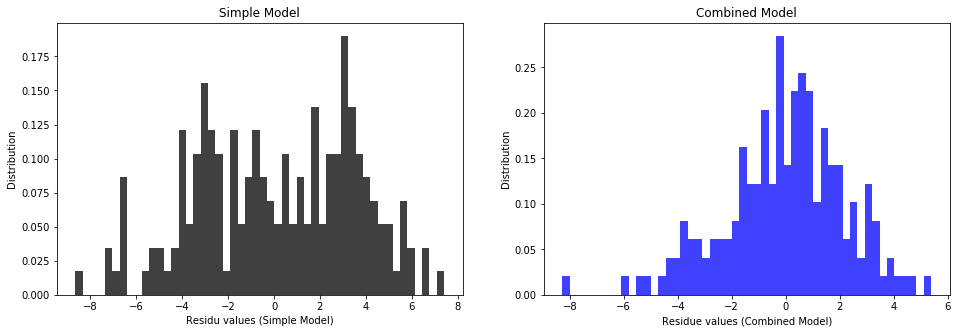

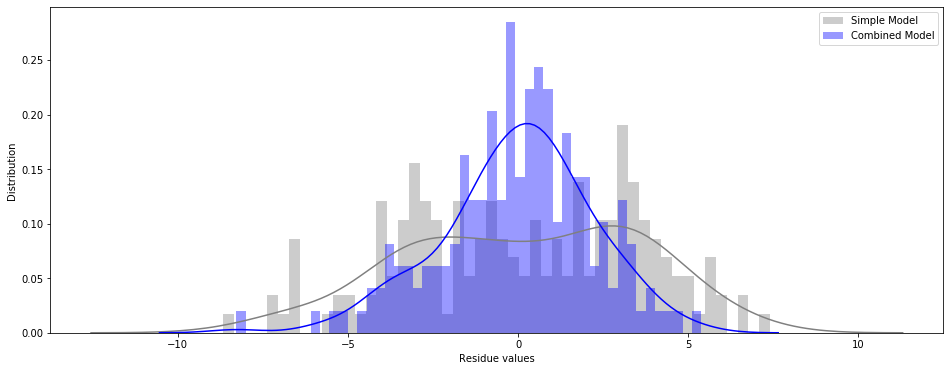

In [22]:
# Residus 
r_AllEstAll           =  y_test    - y_AllEstAll
r_CombinedEstAll      =  y_test    - y_CombinedEstAll


fig7 = plt.figure(figsize=(16,5))
# distribution histogram of the residus
plt.subplot(1,2,1)
ni, binsi, patchesi = plt.hist(r_AllEstAll, 50, density=True, facecolor='k', alpha=0.75,label="Simple Model")
plt.xlabel("Residu values (Simple Model)")
plt.ylabel("Distribution")
plt.title("Simple Model")

plt.subplot(1,2,2)
# nim, binsim, patchesim = 
nim, binsim, patchesim = plt.hist(r_CombinedEstAll, 50, density=True, facecolor='b', alpha=0.75,label="Combined Model")
plt.xlabel("Residue values (Combined Model)")
plt.ylabel("Distribution")
plt.title("Combined Model")

fig8 = plt.figure(figsize=(16,6))
plt.tight_layout()
sns.distplot(r_AllEstAll,label='Simple Model',color='grey',bins=50)
sns.distplot(r_CombinedEstAll,label='Combined Model',color='blue',bins=50)
plt.ylabel("Distribution")
plt.xlabel("Residue values")
plt.legend()
plt.show()

#### La condition de normalité des résidus est respectée avec le modèle combiné.

# QUESTION 12

#### Régression multivariée avec les deux variables explicatives : taille du père, et taille de la mère.

In [23]:
df.sample(2)

,Family,Father,Mother,Gender,Height,Kids,MeanParents
753,173,66.0,67.0,M,65.0,9,69.180
348,83,70.0,63.7,F,63.7,8,69.398


In [24]:
xx_i = df[['Father', 'Mother']].values         
regrxx = sklearnLinearRegression()  
regrxx.fit(xx_i,y_i)
y_ixxEst = regrxx.predict(xx_i)     

#### La régression bilinéaire sur les données donne le plan d'équation :

In [25]:
print('Y = {:.3f} Xfather + {:.3f} Xmother  + {:.3f}'.format(float(regrxx.coef_[0][0]),float(regrxx.coef_[0][1]),float(regrxx.intercept_[0])))

Y = 0.380 Xfather + 0.283 Xmother  + 22.310


In [33]:
XX = np.arange(50, 90, 2)
YY = np.arange(50, 90, 2)
xx, yy = np.meshgrid(XX, YY)
zz = regrxx.intercept_[0] + regrxx.coef_[0][0] * xx + regrxx.coef_[0][1] * yy

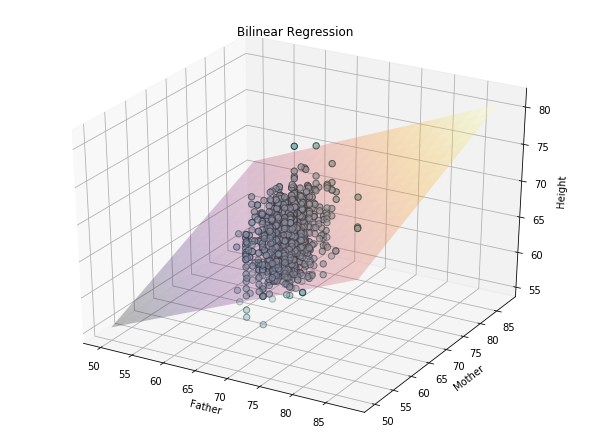

Le risque de prédiction est de 11.43


In [43]:
fig9 = plt.figure(figsize=(8,6))
ax9 = Axes3D(fig9)
ax9.set_xlabel('Father')
ax9.set_ylabel('Mother')
ax9.set_zlabel('Height')
ax9.set_title("Bilinear Regression")
ax9.scatter(df['Father'],df['Mother'],y_i,label='Data', s=40, c=np.array([[.5, .7, .7]]), edgecolor = (.1, .2, 0.2))
ax9.plot_surface(xx,yy,zz,alpha=0.25,cmap=cm.inferno,label='Bilinear Regression')
plt.show()
r_xx      =  y_ixxEst   - y_i
Riskxx   = sum(r_xx**2)/len(r_xx)
print("Le risque de prédiction est de {:.2f}".format(Riskxx[0]))

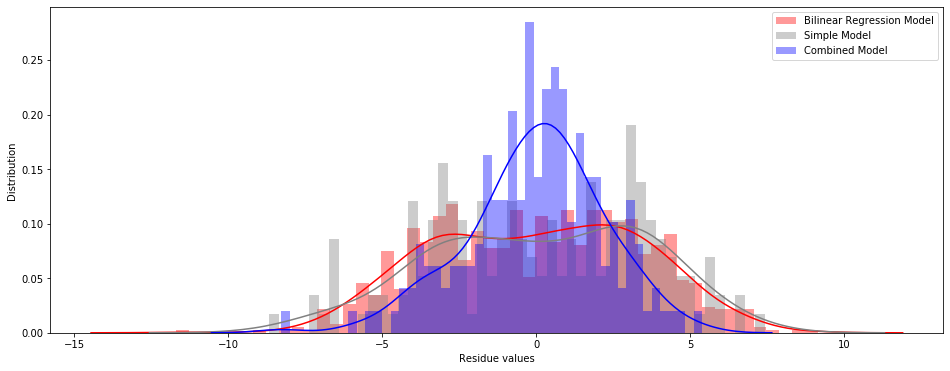

In [28]:
fig10 = plt.figure(figsize=(16,6))
plt.tight_layout()
sns.distplot(r_xx,label='Bilinear Regression Model',color='red',bins=50)
sns.distplot(r_AllEstAll,label='Simple Model',color='grey',bins=50)
sns.distplot(r_CombinedEstAll,label='Combined Model',color='blue',bins=50)
plt.ylabel("Distribution")
plt.xlabel("Residue values")
plt.legend()
plt.show()

#### On peut noter que les résidus correspondant à la regression multivariable (courbe rouge) ne présente pas une loi normale. Le problème de non-séparation des garçons et des filles est toujours présent dans ce cas. En d'autres termes, séparer garçons et fille est plus important que d'ajouter des variables explicatives en séparant le père et la mère comme par exemple ici. L'ajout de variable explicative n'a pas autant d'effet sur le problème de normalité des résidus que la séparation garçons/filles.

# QUESTION 13

#### A l’aide d’un échantillon test (construit comme précédemment), comparer la performance du modèle précédent à celle du modèle contenant seulement la variable MeanParents.

In [29]:
# modèle précédant avec test :
xx_train = train[['Father', 'Mother']].values       
regrxxAll = sklearnLinearRegression()  
regrxxAll.fit(xx_train,y_train)
xx_test  = test[['Father', 'Mother']].values       
y_xxAllEst   = regrxxAll.predict(xx_test)     
r_xxAll      =  y_xxAllEst   - y_test
RiskxxAll    = sum(r_xxAll**2)/len(r_xxAll)
R2_xxEstAll      = 1 - ((y_test - y_xxAllEst) ** 2).sum()     / ((y_test - y_test.mean()) ** 2).sum()
# modèle contenant seulement la variable MeanParents :
y_AllEst     = regrAll.predict(x_test)
r_All        =  y_AllEst   - y_test
RiskAll    = sum(r_All**2)/len(r_All)
R2_AllEst      = 1 - ((y_test - y_AllEst) ** 2).sum()     / ((y_test - y_test.mean()) ** 2).sum()
print("Le coefficient de détermination du modèle bivarié (avec échantillon test) est de {:.2f}".format(R2_xxEstAll))
print("et le risque de prédiction est de {:.2f}".format(RiskxxAll[0]))
print(" ")
print("Le coefficient de détermination du modèle simple (avec échantillon test) est de {:.2f}".format(R2_AllEst)) 
print("et le risque de prédiction est de {:.2f}".format(RiskAll[0]))

Le coefficient de détermination du modèle bivarié (avec échantillon test) est de 0.09
et le risque de prédiction est de 11.83
 
Le coefficient de détermination du modèle simple (avec échantillon test) est de 0.08
et le risque de prédiction est de 11.91


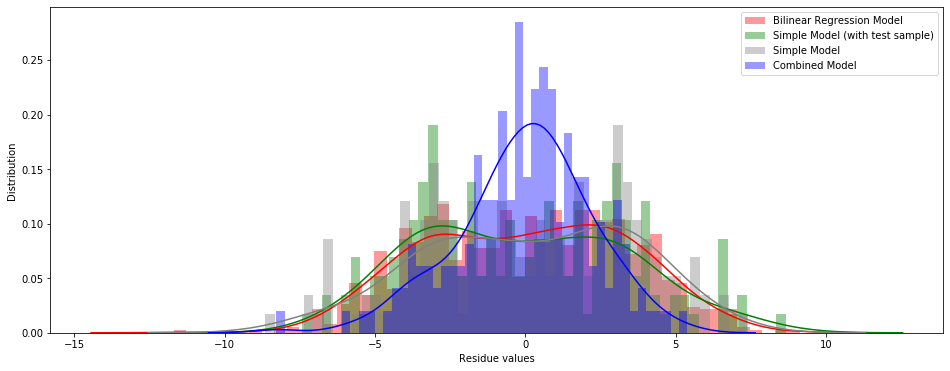

In [30]:
fig11 = plt.figure(figsize=(16,6))
plt.tight_layout()
sns.distplot(r_xx,label='Bilinear Regression Model',color='red',bins=50)
sns.distplot(r_All,label='Simple Model (with test sample)',color='green',bins=50)
sns.distplot(r_AllEstAll,label='Simple Model',color='grey',bins=50)
sns.distplot(r_CombinedEstAll,label='Combined Model',color='blue',bins=50)
plt.ylabel("Distribution")
plt.xlabel("Residue values")
plt.legend()
plt.show()

#### On confirme donc ici les observations précédantes. Le modèle simple avec ou sans entrainement (échantillon test) se révèle aussi peu performant (violation de la loi normale) que le modèle combiné. En conclusion, la séparation garçon-fille est la solution importante pour obtenir un bon modèle de régression linéaire avec un respect de la distribution normale des résidus.